In [51]:
#Cleaned Code with comments
import os 

import numpy as np
import pandas as pd

from glob import glob

import matplotlib.pyplot as plt

In [ ]:
#initially had the question of which year/month produced the most profitable movie
#My approach involved joining the two tables tmdb.movies and tn.movie_budgets on a common title to obtain the date combined 
#with the gross and production budget columns for comparison.

In [52]:
csv_files = glob("zippedData/*.csv.gz")
csv_files
#making a retrievable list of dataframes from zippedData

['zippedData\\bom.movie_gross.csv.gz',
 'zippedData\\imdb.name.basics.csv.gz',
 'zippedData\\imdb.title.akas.csv.gz',
 'zippedData\\imdb.title.basics.csv.gz',
 'zippedData\\imdb.title.crew.csv.gz',
 'zippedData\\imdb.title.principals.csv.gz',
 'zippedData\\imdb.title.ratings.csv.gz',
 'zippedData\\tmdb.movies.csv.gz',
 'zippedData\\tn.movie_budgets.csv.gz']

In [ ]:
#discovering usable dataframes for merging

In [54]:
df1 = pd.read_csv('zippedData\\tmdb.movies.csv.gz')
df1

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [55]:
df2 = pd.read_csv('zippedData\\bom.movie_gross.csv.gz')
df2

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [56]:
df2.set_index(['title'])
#setting index to match other dataframe

,studio,domestic_gross,foreign_gross,year
title,,,,
Toy Story 3,BV,415000000.0,652000000,2010
Alice in Wonderland (2010),BV,334200000.0,691300000,2010
Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
Inception,WB,292600000.0,535700000,2010
Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...
The Quake,Magn.,6200.0,NaN,2018
Edward II (2018 re-release),FM,4800.0,NaN,2018
El Pacto,Sony,2500.0,NaN,2018


In [60]:
df1.set_index(['original_title'])

,Unnamed: 0,genre_ids,id,original_language,popularity,release_date,title,vote_average,vote_count
original_title,,,,,,,,,
Harry Potter and the Deathly Hallows: Part 1,0,"[12, 14, 10751]",12444,en,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
How to Train Your Dragon,1,"[14, 12, 16, 10751]",10191,en,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
Iron Man 2,2,"[12, 28, 878]",10138,en,28.515,2010-05-07,Iron Man 2,6.8,12368
Toy Story,3,"[16, 35, 10751]",862,en,28.005,1995-11-22,Toy Story,7.9,10174
Inception,4,"[28, 878, 12]",27205,en,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...
Laboratory Conditions,26512,"[27, 18]",488143,en,0.600,2018-10-13,Laboratory Conditions,0.0,1
_EXHIBIT_84xxx_,26513,"[18, 53]",485975,en,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
The Last One,26514,"[14, 28, 12]",381231,en,0.600,2018-10-01,The Last One,0.0,1


In [59]:
d3 = pd.read_csv('zippedData\\imdb.title.ratings.csv.gz')
d3

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [57]:
d4 = pd.read_csv('zippedData\\imdb.title.basics.csv.gz')
d4

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN


In [61]:
d3.set_index(d3['tconst'])
d3
#setting index to merge dataframes

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [62]:
d4.set_index(d4['tconst'])

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
tconst,,,,,,
tt0063540,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
tt0066787,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
tt0069049,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
tt0069204,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
tt0100275,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
tt9916538,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
tt9916622,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
tt9916706,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy


In [63]:
joineddd = pd.merge(d4, d3, on = 'tconst')
#merging two dataframes, still has a large amount of values and lets us compare year to averagerating

In [64]:
joineddd

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136
73853,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,NaN,6.6,5


In [65]:
x = joineddd['start_year']
y = joineddd['averagerating']

ValueError: x and y must be the same size

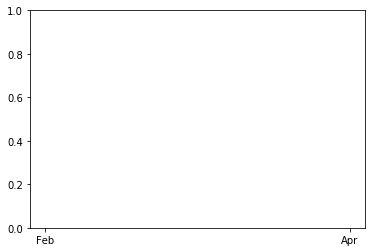

In [134]:
plt.scatter(x,y)
#not much correlation between time and rating

In [67]:
profit_df = pd.read_csv('zippedData\\bom.movie_gross.csv.gz')
profit_df
#setting up joining first dataframe with this one to compare values with profits

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [49]:

#joinedddd = pd.merge(joineddd, profit_df, on = 'title')

In [68]:
profit_df.set_index('title')
#setting index to merge

,studio,domestic_gross,foreign_gross,year
title,,,,
Toy Story 3,BV,415000000.0,652000000,2010
Alice in Wonderland (2010),BV,334200000.0,691300000,2010
Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
Inception,WB,292600000.0,535700000,2010
Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...
The Quake,Magn.,6200.0,NaN,2018
Edward II (2018 re-release),FM,4800.0,NaN,2018
El Pacto,Sony,2500.0,NaN,2018


In [69]:
joineddd.set_index('primary_title')

,tconst,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
primary_title,,,,,,,
Sunghursh,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
One Day Before the Rainy Season,tt0066787,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
The Other Side of the Wind,tt0069049,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
Sabse Bada Sukh,tt0069204,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
The Wandering Soap Opera,tt0100275,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...,...
Diabolik sono io,tt9913084,Diabolik sono io,2019,75.0,Documentary,6.2,6
Sokagin Çocuklari,tt9914286,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136
Albatross,tt9914642,Albatross,2017,NaN,Documentary,8.5,8


In [72]:
joineddd['title'] = joineddd['primary_title']
#making new column that matches column of other dataframe to merge
joineddd

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,title
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,Sunghursh
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43,One Day Before the Rainy Season
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517,The Other Side of the Wind
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13,Sabse Bada Sukh
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119,The Wandering Soap Opera
...,...,...,...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6,Diabolik sono io
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136,Sokagin Çocuklari
73853,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8,Albatross
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,NaN,6.6,5,La vida sense la Sara Amat


In [74]:
joinedddd = pd.merge(profit_df, joineddd, on='title')
joinedddd

,title,studio,domestic_gross,foreign_gross,year,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,Toy Story 3,BV,415000000.0,652000000,2010,tt0435761,Toy Story 3,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy",8.3,682218
1,Inception,WB,292600000.0,535700000,2010,tt1375666,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066
2,Shrek Forever After,P/DW,238700000.0,513900000,2010,tt0892791,Shrek Forever After,Shrek Forever After,2010,93.0,"Adventure,Animation,Comedy",6.3,167532
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,tt1325004,The Twilight Saga: Eclipse,The Twilight Saga: Eclipse,2010,124.0,"Adventure,Drama,Fantasy",5.0,211733
4,Iron Man 2,Par.,312400000.0,311500000,2010,tt1228705,Iron Man 2,Iron Man 2,2010,124.0,"Action,Adventure,Sci-Fi",7.0,657690
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3022,Souvenir,Strand,11400.0,NaN,2018,tt2387692,Souvenir,Souvenir,2016,90.0,"Drama,Music,Romance",6.0,823
3023,Souvenir,Strand,11400.0,NaN,2018,tt2389092,Souvenir,Souvenir,2014,86.0,"Comedy,Romance",5.9,9
3024,Beauty and the Dogs,Osci.,8900.0,NaN,2018,tt6776572,Beauty and the Dogs,Aala Kaf Ifrit,2017,100.0,"Crime,Drama,Thriller",7.0,1016
3025,The Quake,Magn.,6200.0,NaN,2018,tt6523720,The Quake,Skjelvet,2018,106.0,"Action,Drama,Thriller",6.2,5270


In [75]:
joinedddd['studio'] = joinedddd['studio'].fillna(value='No_studio')
#filling in NaN in studio column to correctly filter the results

In [28]:
joinedddd.sort_values(by='domestic_gross', ascending=False)[:50]
#choosing only the top 50 rows of domestic gross

,title,studio,domestic_gross,foreign_gross,year,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
2752,Black Panther,BV,700100000.0,646900000,2018,tt1825683,Black Panther,Black Panther,2018,134.0,"Action,Adventure,Sci-Fi",7.3,516148
2751,Avengers: Infinity War,BV,678800000.0,"1,369.5",2018,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",8.5,670926
1616,Jurassic World,Uni.,652300000.0,"1,019.4",2015,tt0369610,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338
2435,Star Wars: The Last Jedi,BV,620200000.0,712400000,2017,tt2527336,Star Wars: The Last Jedi,Star Wars: Episode VIII - The Last Jedi,2017,152.0,"Action,Adventure,Fantasy",7.1,462903
2754,Incredibles 2,BV,608600000.0,634200000,2018,tt3606756,Incredibles 2,Incredibles 2,2018,118.0,"Action,Adventure,Animation",7.7,203510
2031,Rogue One: A Star Wars Story,BV,532200000.0,523900000,2016,tt3748528,Rogue One: A Star Wars Story,Rogue One,2016,133.0,"Action,Adventure,Sci-Fi",7.8,478592
2032,Finding Dory,BV,486300000.0,542300000,2016,tt2277860,Finding Dory,Finding Dory,2016,97.0,"Adventure,Animation,Comedy",7.3,213542
1618,Avengers: Age of Ultron,BV,459000000.0,946400000,2015,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi",7.3,665594
598,The Dark Knight Rises,WB,448100000.0,636800000,2012,tt1345836,The Dark Knight Rises,The Dark Knight Rises,2012,164.0,"Action,Thriller",8.4,1387769
958,The Hunger Games: Catching Fire,LGF,424700000.0,440300000,2013,tt1951264,The Hunger Games: Catching Fire,The Hunger Games: Catching Fire,2013,146.0,"Action,Adventure,Sci-Fi",7.5,575455


In [76]:
budget_df = pd.read_csv('zippedData\\tn.movie_budgets.csv.gz')
budget_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [77]:
budget_df['title'] = budget_df['movie']
budget_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,title
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",Avatar
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",Pirates of the Caribbean: On Stranger Tides
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",Dark Phoenix
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",Avengers: Age of Ultron
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",Star Wars Ep. VIII: The Last Jedi
...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0,Red 11
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495",Following
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338",Return to the Land of Wonders
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0,A Plague So Pleasant


In [79]:
joined_2 = pd.merge(joinedddd, budget_df, on = 'title')
joined_2
#another merge to obtain profit values 

,title,studio,domestic_gross_x,foreign_gross,year,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,id,release_date,movie,production_budget,domestic_gross_y,worldwide_gross
0,Toy Story 3,BV,415000000.0,652000000,2010,tt0435761,Toy Story 3,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy",8.3,682218,47,"Jun 18, 2010",Toy Story 3,"$200,000,000","$415,004,880","$1,068,879,522"
1,Inception,WB,292600000.0,535700000,2010,tt1375666,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066,38,"Jul 16, 2010",Inception,"$160,000,000","$292,576,195","$835,524,642"
2,Shrek Forever After,P/DW,238700000.0,513900000,2010,tt0892791,Shrek Forever After,Shrek Forever After,2010,93.0,"Adventure,Animation,Comedy",6.3,167532,27,"May 21, 2010",Shrek Forever After,"$165,000,000","$238,736,787","$756,244,673"
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,tt1325004,The Twilight Saga: Eclipse,The Twilight Saga: Eclipse,2010,124.0,"Adventure,Drama,Fantasy",5.0,211733,53,"Jun 30, 2010",The Twilight Saga: Eclipse,"$68,000,000","$300,531,751","$706,102,828"
4,Iron Man 2,Par.,312400000.0,311500000,2010,tt1228705,Iron Man 2,Iron Man 2,2010,124.0,"Action,Adventure,Sci-Fi",7.0,657690,15,"May 7, 2010",Iron Man 2,"$170,000,000","$312,433,331","$621,156,389"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1408,Gotti,VE,4300000.0,NaN,2018,tt1801552,Gotti,Gotti,2018,112.0,"Biography,Crime,Drama",4.8,10358,64,"Jun 15, 2018",Gotti,"$10,000,000","$4,286,367","$6,089,100"
1409,Bilal: A New Breed of Hero,VE,491000.0,1700000,2018,tt3576728,Bilal: A New Breed of Hero,Bilal: A New Breed of Hero,2015,105.0,"Action,Adventure,Animation",8.0,16854,100,"Feb 2, 2018",Bilal: A New Breed of Hero,"$30,000,000","$490,973","$648,599"
1410,Mandy,RLJ,1200000.0,NaN,2018,tt4995858,Mandy,Mandy,2016,113.0,"Drama,Thriller",4.1,39,71,"Sep 14, 2018",Mandy,"$6,000,000","$1,214,525","$1,427,656"
1411,Mandy,RLJ,1200000.0,NaN,2018,tt6998518,Mandy,Mandy,2018,121.0,"Action,Fantasy,Horror",6.6,44378,71,"Sep 14, 2018",Mandy,"$6,000,000","$1,214,525","$1,427,656"


In [81]:
joined_2['month'] = joined_2['release_date'].str[:3]
joined_2
#setting up a column for only the month

,title,studio,domestic_gross_x,foreign_gross,year,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,id,release_date,movie,production_budget,domestic_gross_y,worldwide_gross,month
0,Toy Story 3,BV,415000000.0,652000000,2010,tt0435761,Toy Story 3,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy",8.3,682218,47,"Jun 18, 2010",Toy Story 3,"$200,000,000","$415,004,880","$1,068,879,522",Jun
1,Inception,WB,292600000.0,535700000,2010,tt1375666,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066,38,"Jul 16, 2010",Inception,"$160,000,000","$292,576,195","$835,524,642",Jul
2,Shrek Forever After,P/DW,238700000.0,513900000,2010,tt0892791,Shrek Forever After,Shrek Forever After,2010,93.0,"Adventure,Animation,Comedy",6.3,167532,27,"May 21, 2010",Shrek Forever After,"$165,000,000","$238,736,787","$756,244,673",May
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,tt1325004,The Twilight Saga: Eclipse,The Twilight Saga: Eclipse,2010,124.0,"Adventure,Drama,Fantasy",5.0,211733,53,"Jun 30, 2010",The Twilight Saga: Eclipse,"$68,000,000","$300,531,751","$706,102,828",Jun
4,Iron Man 2,Par.,312400000.0,311500000,2010,tt1228705,Iron Man 2,Iron Man 2,2010,124.0,"Action,Adventure,Sci-Fi",7.0,657690,15,"May 7, 2010",Iron Man 2,"$170,000,000","$312,433,331","$621,156,389",May
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1408,Gotti,VE,4300000.0,NaN,2018,tt1801552,Gotti,Gotti,2018,112.0,"Biography,Crime,Drama",4.8,10358,64,"Jun 15, 2018",Gotti,"$10,000,000","$4,286,367","$6,089,100",Jun
1409,Bilal: A New Breed of Hero,VE,491000.0,1700000,2018,tt3576728,Bilal: A New Breed of Hero,Bilal: A New Breed of Hero,2015,105.0,"Action,Adventure,Animation",8.0,16854,100,"Feb 2, 2018",Bilal: A New Breed of Hero,"$30,000,000","$490,973","$648,599",Feb
1410,Mandy,RLJ,1200000.0,NaN,2018,tt4995858,Mandy,Mandy,2016,113.0,"Drama,Thriller",4.1,39,71,"Sep 14, 2018",Mandy,"$6,000,000","$1,214,525","$1,427,656",Sep
1411,Mandy,RLJ,1200000.0,NaN,2018,tt6998518,Mandy,Mandy,2018,121.0,"Action,Fantasy,Horror",6.6,44378,71,"Sep 14, 2018",Mandy,"$6,000,000","$1,214,525","$1,427,656",Sep


<BarContainer object of 1413 artists>

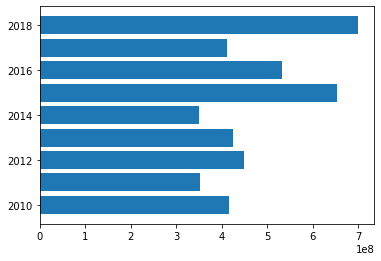

In [38]:
#dump month = january - feburary, starts releasing good stuff during spring (april)
    #expect people to not show up as much, #during january, academy award eligibility rules

#joined_2['year_mine'] = joined_2['release_date'].str[:3]

x = joined_2['year']
y = joined_2['domestic_gross_x']
plt.barh(x,y)
#checking profits vs year to ensure growth in profits vs. time, good correlation with time vs. gross

In [39]:
#studio_joined_df['studio'] = studio_joined_df['studio'].fillna(value='No_studio')
joined_2['studio'] = joined_2['studio'].fillna(value = 'no_studio')

In [40]:
joined_2['studio']

0         BV
1         WB
2       P/DW
3       Sum.
4       Par.
        ... 
1408      VE
1409      VE
1410     RLJ
1411     RLJ
1412     A24
Name: studio, Length: 1413, dtype: object

In [41]:
x = joined_2['studio']
y = joined_2['domestic_gross_x']

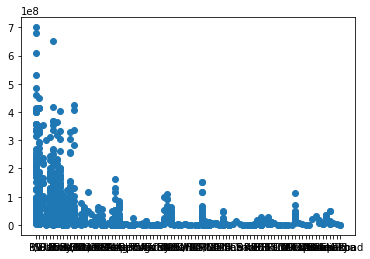

In [42]:
plt.scatter(x,y)

In [82]:
final['worldwide_gross'] = final['worldwide_gross'].str.replace("$", "").str.replace(",","").astype('int')
#tn_movie_budgets_df['production_budget'] = tn_movie_budgets_df['production_budget'].str.replace("$", "").str.replace(",","").astype('int')
#final['profits'] = final['worldwide_gross'] - final['production_budget']


In [83]:
final

,title,studio,domestic_gross_x,foreign_gross,year,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,id,release_date,movie,production_budget,domestic_gross_y,worldwide_gross,month
1303,Black Panther,BV,700100000.0,646900000,2018,tt1825683,Black Panther,Black Panther,2018,134.0,"Action,Adventure,Sci-Fi",7.3,516148,42,"Feb 16, 2018",Black Panther,"$200,000,000","$700,059,566",1348258224,Feb
1302,Avengers: Infinity War,BV,678800000.0,"1,369.5",2018,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",8.5,670926,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482",2048134200,Apr
824,Jurassic World,Uni.,652300000.0,"1,019.4",2015,tt0369610,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338,34,"Jun 12, 2015",Jurassic World,"$215,000,000","$652,270,625",1648854864,Jun
1305,Incredibles 2,BV,608600000.0,634200000,2018,tt3606756,Incredibles 2,Incredibles 2,2018,118.0,"Action,Adventure,Animation",7.7,203510,44,"Jun 15, 2018",Incredibles 2,"$200,000,000","$608,581,744",1242520711,Jun
1005,Rogue One: A Star Wars Story,BV,532200000.0,523900000,2016,tt3748528,Rogue One: A Star Wars Story,Rogue One,2016,133.0,"Action,Adventure,Sci-Fi",7.8,478592,45,"Dec 16, 2016",Rogue One: A Star Wars Story,"$200,000,000","$532,177,324",1049102856,Dec
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
806,Jackpot,DR,800.0,1100000,2014,tt8671762,Jackpot,Jackpot,2018,150.0,"Comedy,Romance",7.8,18,17,"Jul 27, 2001",Jackpot,"$400,000","$44,452",44452,Jul
803,Jackpot,DR,800.0,1100000,2014,tt1809231,Jackpot,Arme Riddere,2011,86.0,"Action,Comedy,Crime",6.6,2941,17,"Jul 27, 2001",Jackpot,"$400,000","$44,452",44452,Jul
804,Jackpot,DR,800.0,1100000,2014,tt3309662,Jackpot,Jackpot,2013,132.0,"Comedy,Thriller",2.1,647,17,"Jul 27, 2001",Jackpot,"$400,000","$44,452",44452,Jul
805,Jackpot,DR,800.0,1100000,2014,tt4320966,Jackpot,Trung so,2015,92.0,Comedy,6.7,55,17,"Jul 27, 2001",Jackpot,"$400,000","$44,452",44452,Jul


In [84]:
final['production_budget'] = final['production_budget'].str.replace("$", "").str.replace(",","").astype('int')

In [85]:
final

,title,studio,domestic_gross_x,foreign_gross,year,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,id,release_date,movie,production_budget,domestic_gross_y,worldwide_gross,month
1303,Black Panther,BV,700100000.0,646900000,2018,tt1825683,Black Panther,Black Panther,2018,134.0,"Action,Adventure,Sci-Fi",7.3,516148,42,"Feb 16, 2018",Black Panther,200000000,"$700,059,566",1348258224,Feb
1302,Avengers: Infinity War,BV,678800000.0,"1,369.5",2018,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",8.5,670926,7,"Apr 27, 2018",Avengers: Infinity War,300000000,"$678,815,482",2048134200,Apr
824,Jurassic World,Uni.,652300000.0,"1,019.4",2015,tt0369610,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338,34,"Jun 12, 2015",Jurassic World,215000000,"$652,270,625",1648854864,Jun
1305,Incredibles 2,BV,608600000.0,634200000,2018,tt3606756,Incredibles 2,Incredibles 2,2018,118.0,"Action,Adventure,Animation",7.7,203510,44,"Jun 15, 2018",Incredibles 2,200000000,"$608,581,744",1242520711,Jun
1005,Rogue One: A Star Wars Story,BV,532200000.0,523900000,2016,tt3748528,Rogue One: A Star Wars Story,Rogue One,2016,133.0,"Action,Adventure,Sci-Fi",7.8,478592,45,"Dec 16, 2016",Rogue One: A Star Wars Story,200000000,"$532,177,324",1049102856,Dec
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
806,Jackpot,DR,800.0,1100000,2014,tt8671762,Jackpot,Jackpot,2018,150.0,"Comedy,Romance",7.8,18,17,"Jul 27, 2001",Jackpot,400000,"$44,452",44452,Jul
803,Jackpot,DR,800.0,1100000,2014,tt1809231,Jackpot,Arme Riddere,2011,86.0,"Action,Comedy,Crime",6.6,2941,17,"Jul 27, 2001",Jackpot,400000,"$44,452",44452,Jul
804,Jackpot,DR,800.0,1100000,2014,tt3309662,Jackpot,Jackpot,2013,132.0,"Comedy,Thriller",2.1,647,17,"Jul 27, 2001",Jackpot,400000,"$44,452",44452,Jul
805,Jackpot,DR,800.0,1100000,2014,tt4320966,Jackpot,Trung so,2015,92.0,Comedy,6.7,55,17,"Jul 27, 2001",Jackpot,400000,"$44,452",44452,Jul


In [86]:
final['profits'] = final['worldwide_gross'] - final['production_budget']
final
#creating a column for profits

,title,studio,domestic_gross_x,foreign_gross,year,tconst,primary_title,original_title,start_year,runtime_minutes,...,averagerating,numvotes,id,release_date,movie,production_budget,domestic_gross_y,worldwide_gross,month,profits
1303,Black Panther,BV,700100000.0,646900000,2018,tt1825683,Black Panther,Black Panther,2018,134.0,...,7.3,516148,42,"Feb 16, 2018",Black Panther,200000000,"$700,059,566",1348258224,Feb,1148258224
1302,Avengers: Infinity War,BV,678800000.0,"1,369.5",2018,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,...,8.5,670926,7,"Apr 27, 2018",Avengers: Infinity War,300000000,"$678,815,482",2048134200,Apr,1748134200
824,Jurassic World,Uni.,652300000.0,"1,019.4",2015,tt0369610,Jurassic World,Jurassic World,2015,124.0,...,7.0,539338,34,"Jun 12, 2015",Jurassic World,215000000,"$652,270,625",1648854864,Jun,1433854864
1305,Incredibles 2,BV,608600000.0,634200000,2018,tt3606756,Incredibles 2,Incredibles 2,2018,118.0,...,7.7,203510,44,"Jun 15, 2018",Incredibles 2,200000000,"$608,581,744",1242520711,Jun,1042520711
1005,Rogue One: A Star Wars Story,BV,532200000.0,523900000,2016,tt3748528,Rogue One: A Star Wars Story,Rogue One,2016,133.0,...,7.8,478592,45,"Dec 16, 2016",Rogue One: A Star Wars Story,200000000,"$532,177,324",1049102856,Dec,849102856
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
806,Jackpot,DR,800.0,1100000,2014,tt8671762,Jackpot,Jackpot,2018,150.0,...,7.8,18,17,"Jul 27, 2001",Jackpot,400000,"$44,452",44452,Jul,-355548
803,Jackpot,DR,800.0,1100000,2014,tt1809231,Jackpot,Arme Riddere,2011,86.0,...,6.6,2941,17,"Jul 27, 2001",Jackpot,400000,"$44,452",44452,Jul,-355548
804,Jackpot,DR,800.0,1100000,2014,tt3309662,Jackpot,Jackpot,2013,132.0,...,2.1,647,17,"Jul 27, 2001",Jackpot,400000,"$44,452",44452,Jul,-355548
805,Jackpot,DR,800.0,1100000,2014,tt4320966,Jackpot,Trung so,2015,92.0,...,6.7,55,17,"Jul 27, 2001",Jackpot,400000,"$44,452",44452,Jul,-355548


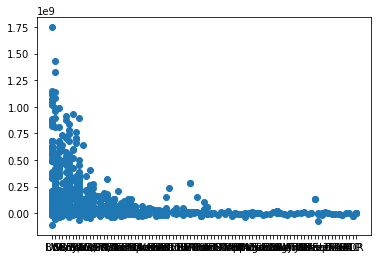

In [87]:
x = final['studio']
y = final['profits']
plt.scatter(x,y)

In [88]:
finalfinal = final.sort_values(by = 'domestic_gross_x', ascending=False)[:200]

In [90]:

finalfinal

,title,studio,domestic_gross_x,foreign_gross,year,tconst,primary_title,original_title,start_year,runtime_minutes,...,averagerating,numvotes,id,release_date,movie,production_budget,domestic_gross_y,worldwide_gross,month,profits
1303,Black Panther,BV,700100000.0,646900000,2018,tt1825683,Black Panther,Black Panther,2018,134.0,...,7.3,516148,42,"Feb 16, 2018",Black Panther,200000000,"$700,059,566",1348258224,Feb,1148258224
1302,Avengers: Infinity War,BV,678800000.0,"1,369.5",2018,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,...,8.5,670926,7,"Apr 27, 2018",Avengers: Infinity War,300000000,"$678,815,482",2048134200,Apr,1748134200
824,Jurassic World,Uni.,652300000.0,"1,019.4",2015,tt0369610,Jurassic World,Jurassic World,2015,124.0,...,7.0,539338,34,"Jun 12, 2015",Jurassic World,215000000,"$652,270,625",1648854864,Jun,1433854864
1305,Incredibles 2,BV,608600000.0,634200000,2018,tt3606756,Incredibles 2,Incredibles 2,2018,118.0,...,7.7,203510,44,"Jun 15, 2018",Incredibles 2,200000000,"$608,581,744",1242520711,Jun,1042520711
1005,Rogue One: A Star Wars Story,BV,532200000.0,523900000,2016,tt3748528,Rogue One: A Star Wars Story,Rogue One,2016,133.0,...,7.8,478592,45,"Dec 16, 2016",Rogue One: A Star Wars Story,200000000,"$532,177,324",1049102856,Dec,849102856
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,Life of Pi,Fox,125000000.0,484000000,2012,tt0454876,Life of Pi,Life of Pi,2012,127.0,...,7.9,535836,88,"Nov 21, 2012",Life of Pi,120000000,"$124,987,022",620912003,Nov,500912003
403,The Vow,SGem,125000000.0,71100000,2012,tt1606389,The Vow,The Vow,2012,104.0,...,6.8,173629,42,"Feb 10, 2012",The Vow,30000000,"$125,014,030",197618160,Feb,167618160
200,Rango,Par.,123500000.0,122200000,2011,tt1192628,Rango,Rango,2011,107.0,...,7.2,215761,29,"Mar 4, 2011",Rango,135000000,"$123,477,607",245724600,Mar,110724600
843,The Good Dinosaur,BV,123100000.0,209100000,2015,tt1979388,The Good Dinosaur,The Good Dinosaur,2015,93.0,...,6.7,91465,73,"Nov 25, 2015",The Good Dinosaur,187500000,"$123,087,120",333771037,Nov,146271037


Text(0.5, 1.0, 'Studios vs. Profits')

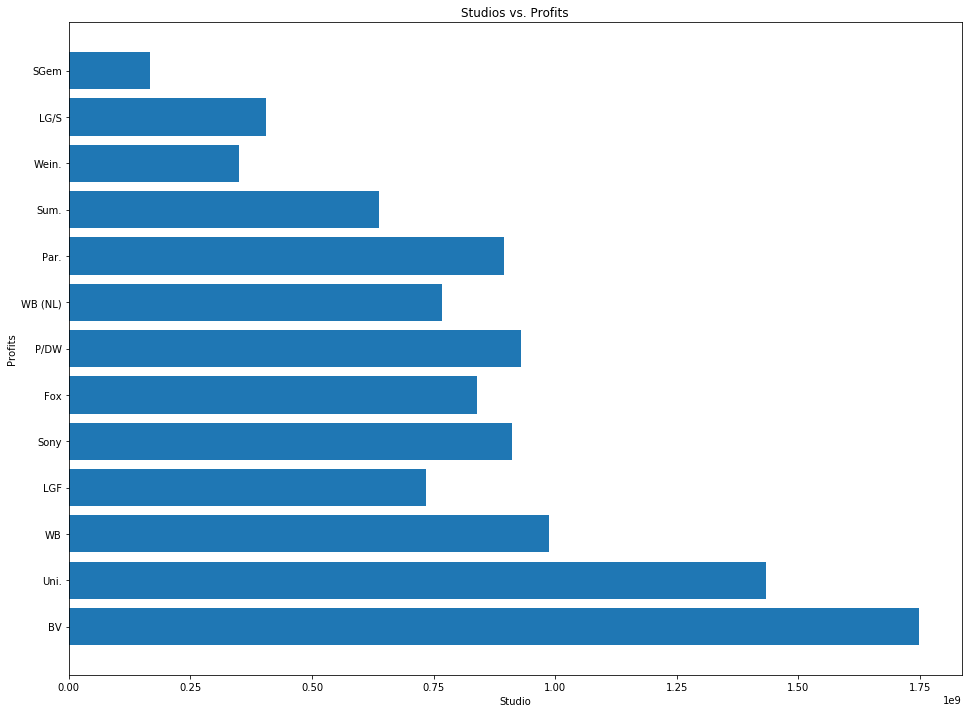

In [122]:
plt.figure(figsize=(16, 12))
x = finalfinal['studio']
y = finalfinal['profits']
plt.barh(x,y)

plt.xlabel('Studio')
plt.ylabel('Profits')
plt.title("Studios vs. Profits")

#seeing studio vs. profits, which studio was most profitable, used only top 150 or else chart was very haphazard

Text(0.5, 1.0, 'Ratings vs. Profits')

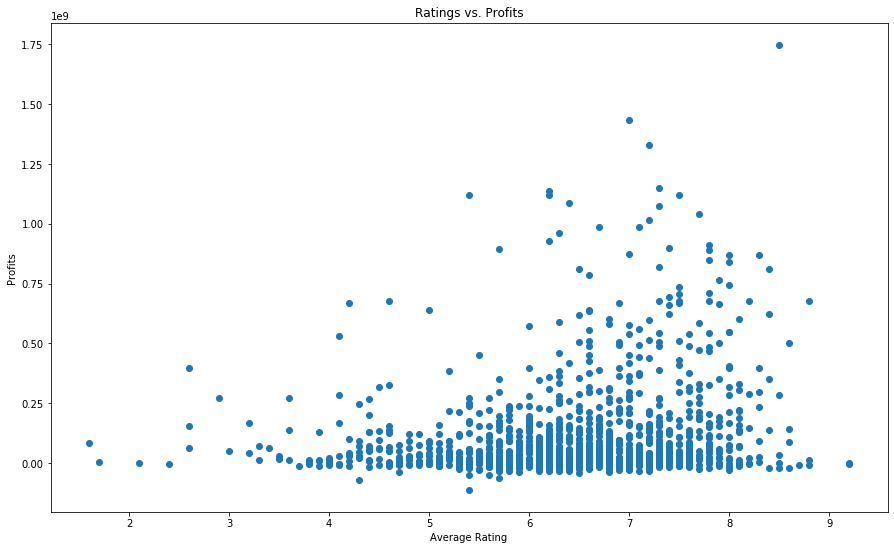

In [123]:
plt.figure(figsize=(15,9))
x = final['averagerating']
y = final['profits']
#correlations in that better grossing movies tended to also do better with audiences
plt.scatter(x,y, label = "Ratings vs. Profits")

plt.xlabel('Average Rating')
plt.ylabel('Profits')
plt.title("Ratings vs. Profits")

Text(0.5, 1.0, 'Month vs. Profits')

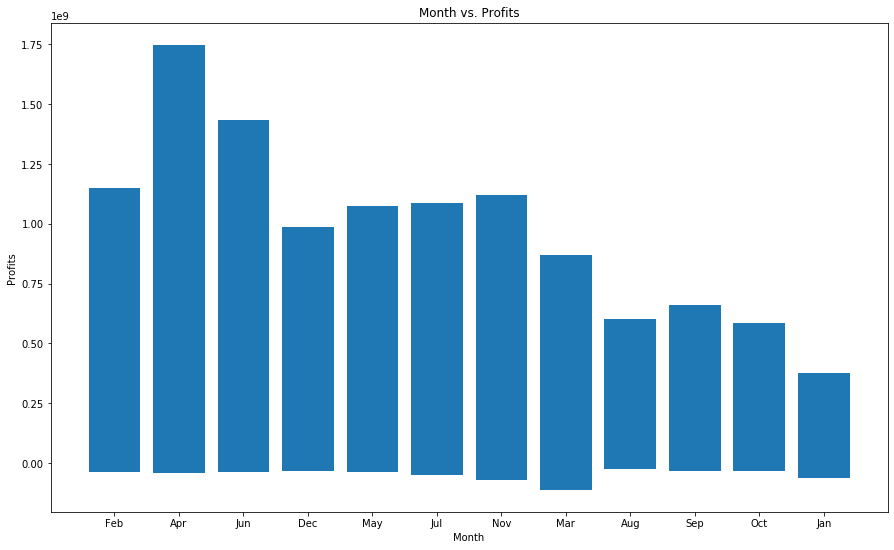

In [124]:
plt.figure(figsize=(15,9))
x = final['month']
y = final['profits']
plt.bar(x,y)

plt.xlabel('Month')
plt.ylabel('Profits')
plt.title("Month vs. Profits")

#seeing which month produced the most profits, reasons explored in powerpoint and down below

Text(0.5, 1.0, 'Year vs. Profits')

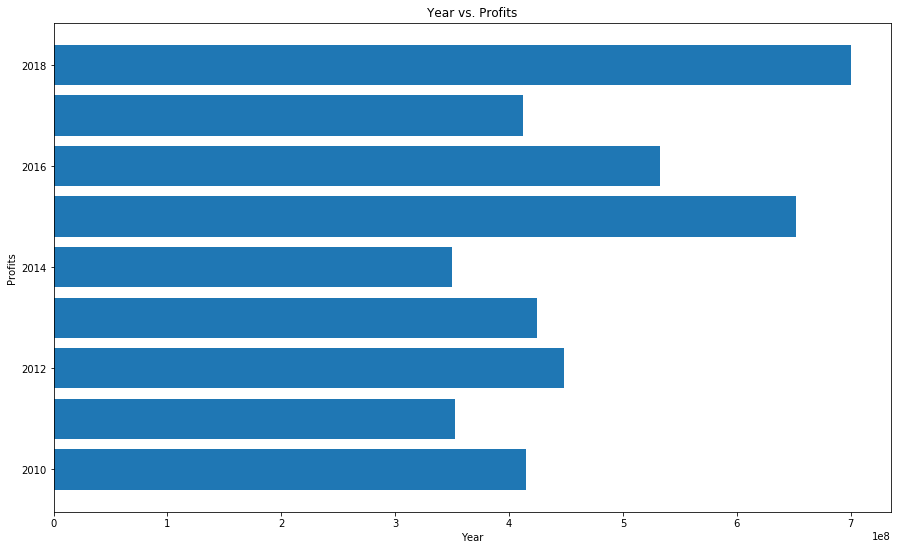

In [126]:
plt.figure(figsize=(15,9))
x = joined_2['year']
y = joined_2['domestic_gross_x']

plt.barh(x,y)

plt.xlabel('Year')
plt.ylabel('Profits')
plt.title("Year vs. Profits")

#seeing if the profits are on an uptrend 

In [ ]:
Question 1: Does the release date affect the ratings or profits for the movie?
    Yes. There was definitely a positive correlation in year vs. profits, with profits exploding higher in the recent years. 
    This is probably due to the explicit growth in the industry itself, making it a viable industry to invest in the first
    place. There were also anomalies in the monthly profits. There was a huge decline in movie profits and movie releases
    on January while profits during June and April especially were very high. Also, there was a huge difference in January 
    vs. Febuary profits. 

In [ ]:
Question 2: Is there a better studio to work with? Are there studios that produce more profit than others?
    Yes. BV. and UNI made exponenially more than the others. Mostly through large movies that produced a disportionate 
    amount of profit. These studios are better to work with as they have more potential it seems. 

In [ ]:
Question 3: Is there a point in focusing on how well the movie does? Is there a correlation between rating and profit?
    Somewhat. Most of the movies did not produce much profit so those were pretty random in terms of rating. However, 
    a lot of movies that made a lot of money were always pretty well reviewed, showing us that there is significance in 
    a better movie, though it seems to only be for large movies that generate a lot of revenue.